# **Impotrs & Read Data**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!kaggle datasets download -d vivek468/superstore-dataset-final

Dataset URL: https://www.kaggle.com/datasets/vivek468/superstore-dataset-final
License(s): other
  0% 0.00/550k [00:00<?, ?B/s]
100% 550k/550k [00:00<00:00, 10.4MB/s]


In [ ]:
!unzip superstore-dataset-final.zip

Archive:  superstore-dataset-final.zip
  inflating: Sample - Superstore.csv  


In [ ]:
data = pd.read_csv("/content/Sample - Superstore.csv", encoding='windows-1252')


In [ ]:
pip install pandas matplotlib prophet


# **Sales for next 6 months**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet


In [ ]:
# Convert Order Date to datetime
data['Order Date'] = pd.to_datetime(data['Order Date'])

In [ ]:
# Step 1: Aggregate sales data by month
monthly_sales = data.groupby(data['Order Date'].dt.to_period('M')).agg({'Sales': 'sum'}).reset_index()
monthly_sales['Order Date'] = monthly_sales['Order Date'].dt.to_timestamp()  # Convert to timestamp for Prophet

In [ ]:
# Step 2: Prepare the data for Prophet
# Prophet requires two columns: 'ds' for dates and 'y' for values
monthly_sales = monthly_sales.rename(columns={'Order Date': 'ds', 'Sales': 'y'})

In [ ]:
# Step 3: Initialize and fit Prophet model
model = Prophet()
model.fit(monthly_sales)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptcunj8kd/bas1kovm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptcunj8kd/gyfkgj97.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79090', 'data', 'file=/tmp/tmptcunj8kd/bas1kovm.json', 'init=/tmp/tmptcunj8kd/gyfkgj97.json', 'output', 'file=/tmp/tmptcunj8kd/prophet_modelqtq2q9k4/prophet_model-20241015144835.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:48:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:48:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Step 4: Create a future dataframe for 6 months
future = model.make_future_dataframe(periods=6, freq='M')


In [ ]:
# Step 5: Forecast the future sales
forecast = model.predict(future)

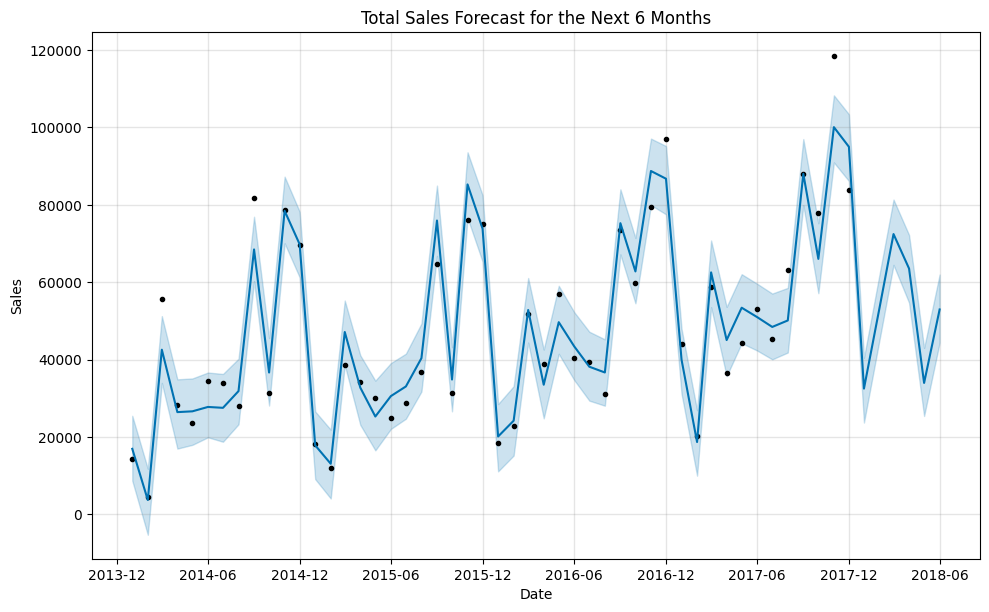

In [ ]:
# Step 6: Plot the forecast
model.plot(forecast)
plt.title('Total Sales Forecast for the Next 6 Months')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [ ]:
# Optional: Show the forecasted sales for the next 6 months
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(6)  # 'yhat' is the predicted sales

,ds,yhat,yhat_lower,yhat_upper
48,2017-12-31,32512.761784,23740.608838,40469.966252
49,2018-01-31,53334.163026,45091.009348,62008.983359
50,2018-02-28,72434.094412,64472.556685,81342.691216
51,2018-03-31,63522.695609,54696.657844,72193.447336
52,2018-04-30,33971.971296,25441.137973,43024.755183
53,2018-05-31,52957.195141,44397.756552,61977.035571


# **Profit Forecast for the Next 6 Months**

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwu_hbxy3/3a_o6g4w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwu_hbxy3/jzw6txd0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41207', 'data', 'file=/tmp/tmpwu_hbxy3/3a_o6g4w.json', 'init=/tmp/tmpwu_hbxy3/jzw6txd0.json', 'output', 'file=/tmp/tmpwu_hbxy3/prophet_modelfa903aqs/prophet_model-20241014194300.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:43:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:43:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


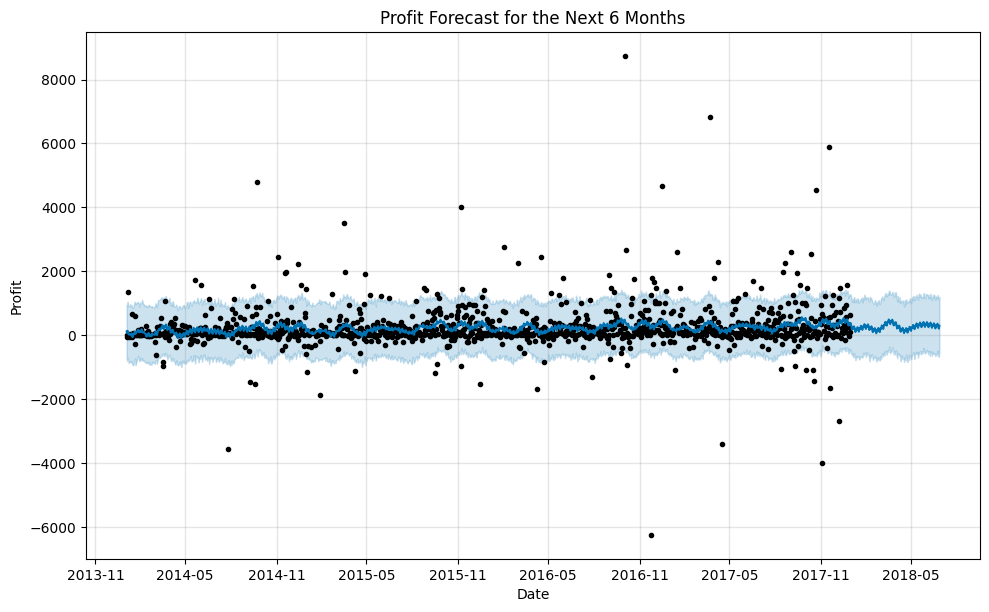

In [ ]:
# Step 3: Preprocess the data
data['Order Date'] = pd.to_datetime(data['Order Date'])
df_profit = data.groupby('Order Date').sum().reset_index()[['Order Date', 'Profit']]

# Step 4: Prepare the data for Prophet (rename columns to 'ds' and 'y' as required by Prophet)
df_profit = df_profit.rename(columns={'Order Date': 'ds', 'Profit': 'y'})

# Step 5: Initialize and fit the Prophet model
model = Prophet()
model.fit(df_profit)

# Step 6: Create a future dataframe for the next 6 months
future = model.make_future_dataframe(periods=180)  # Forecast for 6 months (roughly 180 days)

# Step 7: Predict the future profits
forecast = model.predict(future)

# Step 8: Visualize the forecast
fig = model.plot(forecast)
plt.title('Profit Forecast for the Next 6 Months')
plt.ylabel('Profit')
plt.xlabel('Date')
plt.show()


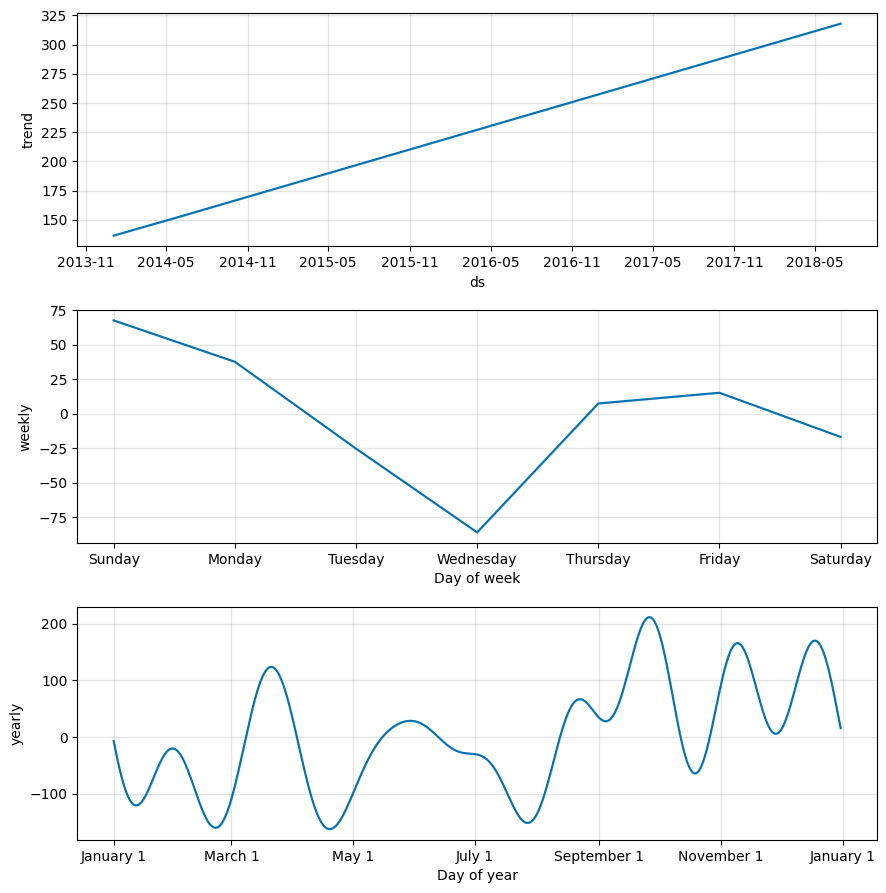

In [ ]:
# Optional: You can also visualize the components of the forecast
fig2 = model.plot_components(forecast)
plt.show()

# **Outliers in profit**

In [ ]:
# Step 3: Preprocess the data
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

# Calculating the shipping delay (difference between Ship Date and Order Date)
data['Shipping Delay'] = (data['Ship Date'] - data['Order Date']).dt.days

In [ ]:
# Assuming 'profit' is the profit column and 'date' is the date column
outliers_high = data[data['Profit'] > data['Profit'].quantile(0.95)]  # Top 5% highest profits
outliers_low = data[data['Profit'] < data['Profit'].quantile(0.05)]   # Bottom 5% lowest profits

# Display the dates and corresponding data points for both
print("High Profit Outliers:")
print(outliers_high[['Order Date', 'Profit', 'Sales', 'Discount', 'Shipping Delay', 'Category']])

print("\nLow Profit Outliers:")
print(outliers_low[['Order Date', 'Profit', 'Sales', 'Discount', 'Shipping Delay', 'Category']])


High Profit Outliers:
     Order Date    Profit     Sales  Discount  Shipping Delay         Category
1    2016-11-08  219.5820   731.940       0.0               3        Furniture
24   2015-09-25  240.2649  1044.630       0.0               5        Furniture
54   2016-12-11  298.6855  1029.950       0.0               6       Technology
144  2017-12-22  218.2518   839.430       0.0               5  Office Supplies
149  2016-12-05  585.5520  1951.840       0.0               4        Furniture
...         ...       ...       ...       ...             ...              ...
9925 2015-03-20  353.5792  1087.936       0.2               3  Office Supplies
9929 2016-09-04  944.9865  2799.960       0.2               0       Technology
9947 2017-06-01  539.2464  1925.880       0.0               2        Furniture
9948 2017-06-01  793.7160  2405.200       0.0               2  Office Supplies
9968 2017-12-11  331.1910   735.980       0.0               6  Office Supplies

[499 rows x 6 columns]

Low P

# **Discount affect sales**

            Sales  Discount
Sales     1.00000  -0.02819
Discount -0.02819   1.00000


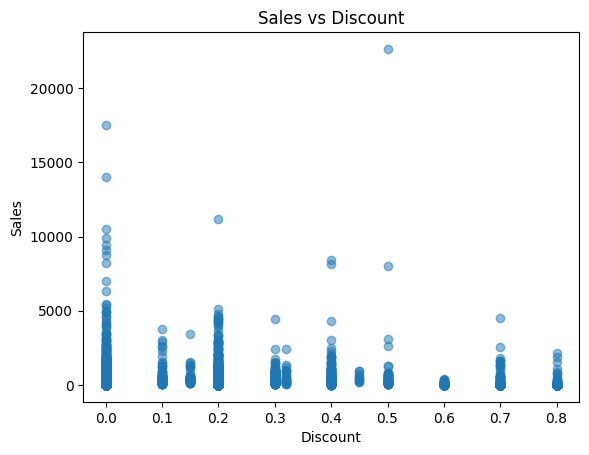

In [ ]:
# Correlation between discount and sales
correlation = data[['Sales', 'Discount']].corr()
print(correlation)

# Visualize the relationship
plt.scatter(data['Discount'], data['Sales'], alpha=0.5)
plt.title("Sales vs Discount")
plt.xlabel("Discount")
plt.ylabel("Sales")
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Order Date' to datetime if not already done
data['Order Date'] = pd.to_datetime(data['Order Date'])

# Extract year from 'Order Date'
data['Year'] = data['Order Date'].dt.year

# Group by Year and calculate mean discount, total sales, and total profit
yearly_data = data.groupby('Year').agg({
    'Discount': 'mean',    # Average discount per year
    'Sales': 'sum',        # Total sales per year
    'Profit': 'sum'        # Total profit per year
}).reset_index()

print(yearly_data)


   Year  Discount        Sales      Profit
0  2014  0.158284  484247.4981  49543.9741
1  2015  0.155609  470532.5090  61618.6037
2  2016  0.154743  609205.5980  81795.1743
3  2017  0.156467  733215.2552  93439.2696


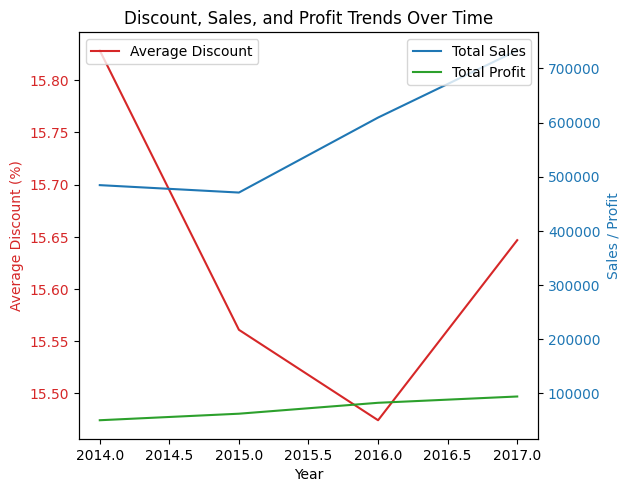

In [ ]:
# Plot trends for discount, sales, and profit over the years

fig, ax1 = plt.subplots()

# Plot discount trend (in percentage form)
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Discount (%)', color='tab:red')
ax1.plot(yearly_data['Year'], yearly_data['Discount'] * 100, color='tab:red', label='Average Discount')
ax1.tick_params(axis='y', labelcolor='tab:red')

# Create a second y-axis to plot sales and profit
ax2 = ax1.twinx()
ax2.set_ylabel('Sales / Profit', color='tab:blue')

# Plot sales trend
ax2.plot(yearly_data['Year'], yearly_data['Sales'], color='tab:blue', label='Total Sales')
ax2.plot(yearly_data['Year'], yearly_data['Profit'], color='tab:green', label='Total Profit')
ax2.tick_params(axis='y', labelcolor='tab:blue')

# Add a legend and title
fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('Discount, Sales, and Profit Trends Over Time')

plt.show()


# **Sales Forecast by Product Category or Sub-Category**

In [ ]:
!pip install fbprophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 89.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 70.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 3.8 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for fbprophet
  Running set

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt



In [ ]:

# Convert the Order Date to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'])

# Extract year and month for aggregating sales
data['YearMonth'] = data['Order Date'].dt.to_period('M')

# Group by category and time to get monthly sales per category
monthly_sales = data.groupby(['YearMonth', 'Category'])['Sales'].sum().reset_index()

# Convert YearMonth back to datetime for Prophet to work with
monthly_sales['YearMonth'] = monthly_sales['YearMonth'].dt.to_timestamp()

# Filter for a specific category, for example 'Furniture'
furniture_sales = monthly_sales[monthly_sales['Category'] == 'Furniture']
furniture_sales = furniture_sales[['YearMonth', 'Sales']].rename(columns={'YearMonth': 'ds', 'Sales': 'y'})


In [ ]:
# Initialize Prophet model
model = Prophet()

# Fit the model on the sales data
model.fit(furniture_sales)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwu_hbxy3/qejvntx_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwu_hbxy3/5b4jo7xr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1634', 'data', 'file=/tmp/tmpwu_hbxy3/qejvntx_.json', 'init=/tmp/tmpwu_hbxy3/5b4jo7xr.json', 'output', 'file=/tmp/tmpwu_hbxy3/prophet_modellf1mk6s4/prophet_model-20241014205509.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
20:55:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:55:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Create future dates dataframe for the next 6 months
future = model.make_future_dataframe(periods=6, freq='M')

# Forecast sales
forecast = model.predict(future)

# Check the forecasted data
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
49,2018-01-31,7344.812602,4275.281515,10415.172747
50,2018-02-28,22757.727157,19701.222747,25822.774692
51,2018-03-31,14334.803911,11383.830134,17257.598599
52,2018-04-30,8754.045130,5607.798679,11990.298415
53,2018-05-31,13152.180582,10165.984187,16371.520231


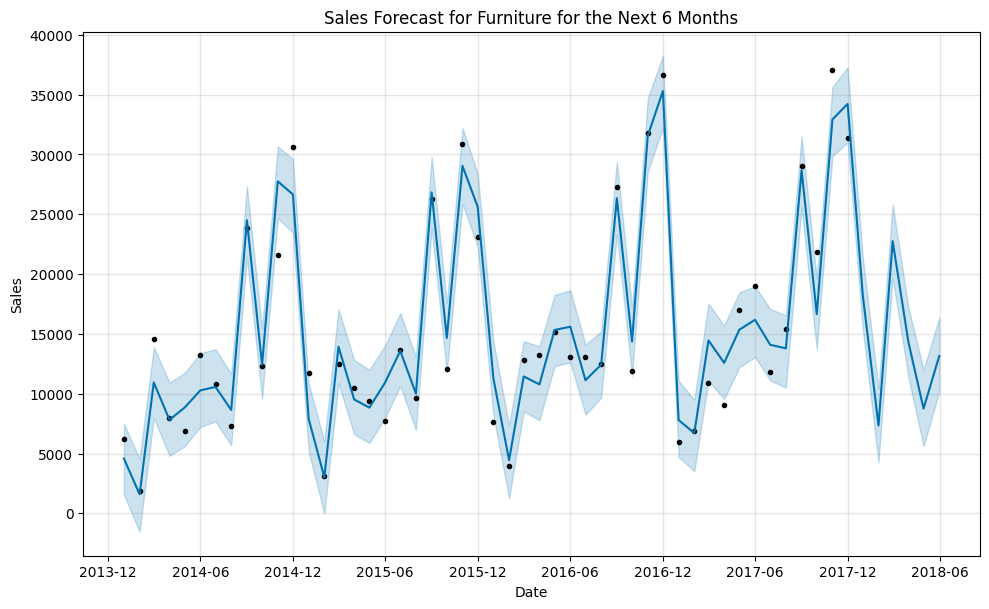

In [ ]:
# Plot the forecast
model.plot(forecast)
plt.title('Sales Forecast for Furniture for the Next 6 Months')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


In [ ]:
# For Office Supplies
office_supplies_sales = monthly_sales[monthly_sales['Category'] == 'Office Supplies']
office_supplies_sales = office_supplies_sales[['YearMonth', 'Sales']].rename(columns={'YearMonth': 'ds', 'Sales': 'y'})

# Fit and forecast as before
# Initialize Prophet model
model = Prophet()

# Fit the model on the sales data
model.fit(office_supplies_sales)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwu_hbxy3/dq1cm1qy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwu_hbxy3/ncn0vfi9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82169', 'data', 'file=/tmp/tmpwu_hbxy3/dq1cm1qy.json', 'init=/tmp/tmpwu_hbxy3/ncn0vfi9.json', 'output', 'file=/tmp/tmpwu_hbxy3/prophet_modelhy7gf_0q/prophet_model-20241014205728.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
20:57:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:57:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


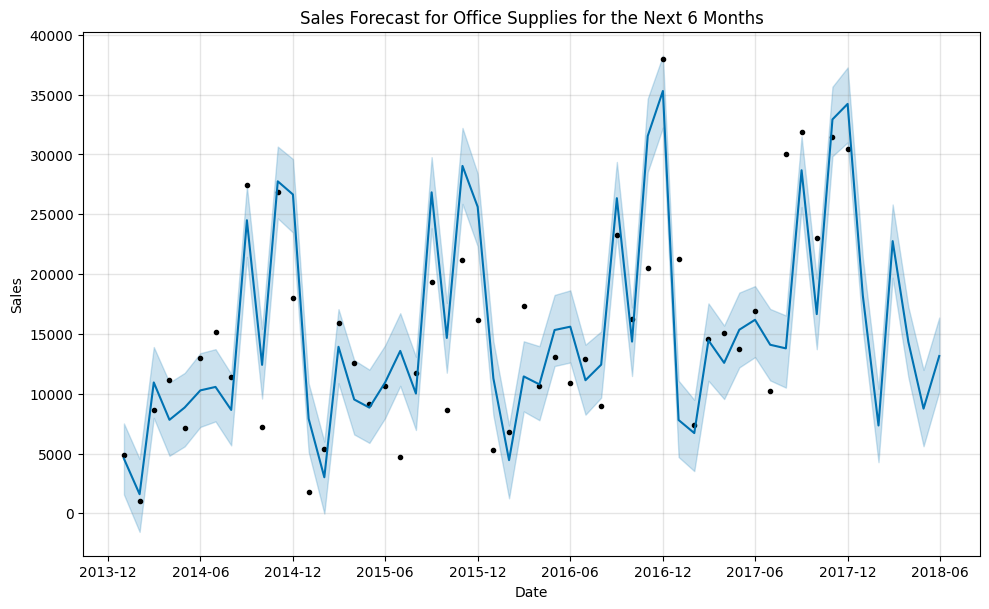

In [ ]:
# Plot the forecast
model.plot(forecast)
plt.title('Sales Forecast for Office Supplies for the Next 6 Months')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


In [ ]:
# For Office Supplies
tech_sales = monthly_sales[monthly_sales['Category'] == 'Technology']
tech_sales = tech_sales[['YearMonth', 'Sales']].rename(columns={'YearMonth': 'ds', 'Sales': 'y'})

# Fit and forecast as before
# Initialize Prophet model
model = Prophet()

# Fit the model on the sales data
model.fit(tech_sales)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwu_hbxy3/cibxbk22.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwu_hbxy3/yhv8ifdc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7937', 'data', 'file=/tmp/tmpwu_hbxy3/cibxbk22.json', 'init=/tmp/tmpwu_hbxy3/yhv8ifdc.json', 'output', 'file=/tmp/tmpwu_hbxy3/prophet_modelyqoc4qo6/prophet_model-20241014205922.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
20:59:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:59:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


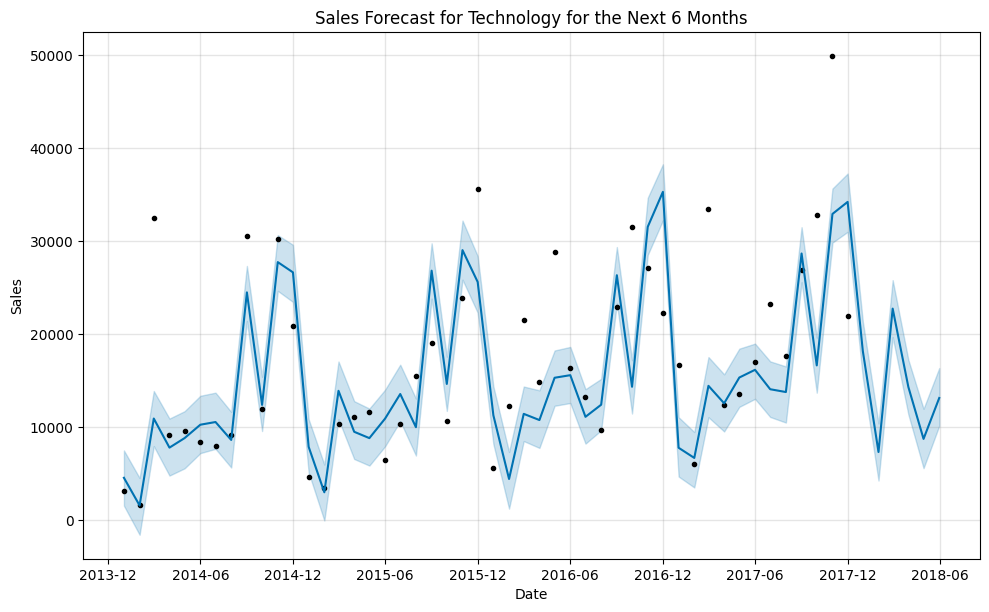

In [ ]:
# Plot the forecast
model.plot(forecast)
plt.title('Sales Forecast for Technology for the Next 6 Months')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


# **Customer Segment-Based Sales Forecasting**

In [ ]:
# Group by 'Year' and 'Segment' to get total sales for each year and segment
segment_sales = data.groupby(['Year', 'Segment'])['Sales'].sum().unstack()
segment_sales

Segment,Consumer,Corporate,Home Office
Year,,,
2014,266096.8126,128434.8737,89715.8118
2015,266535.9333,128757.3069,75239.2688
2016,296863.8992,207106.3618,105235.3370
2017,331904.6999,241847.8244,159462.7309


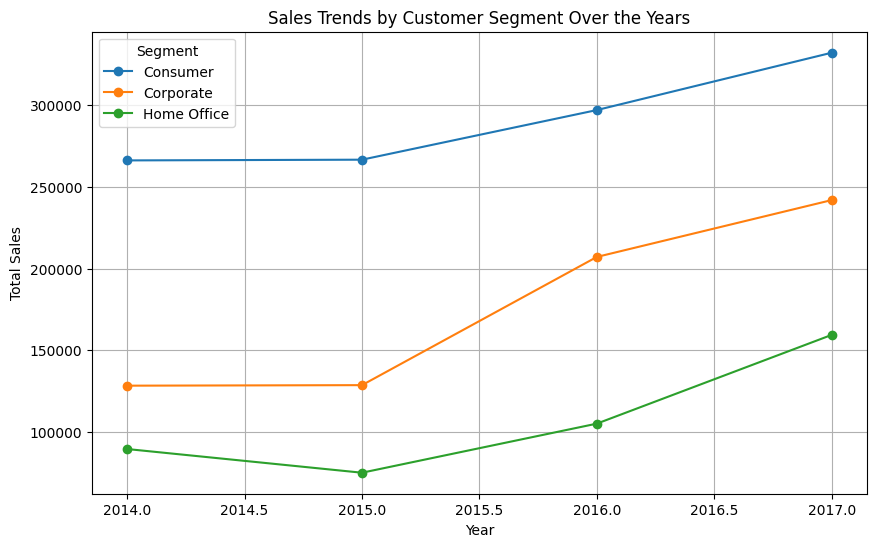

In [ ]:
# Plotting sales trends for each segment
segment_sales.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Sales Trends by Customer Segment Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()
